In [1]:
from langgraph.graph import StateGraph, START, MessagesState
from langgraph.checkpoint.postgres import PostgresSaver
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv

c:\Codes\Learning\Lang_graph\venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [3]:
load_dotenv()

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [4]:
res = llm.invoke("hi").content

In [5]:
res

'Hi there! How can I help you today?'

In [6]:
from langchain_core.messages.utils import trim_messages,count_tokens_approximately
from langgraph.checkpoint.memory import InMemorySaver


In [7]:

MAX_TOKENS = 150

In [13]:
def call_model(state: MessagesState):
    
    # Trim conversation history -> last N messages that fit within the token budget
    messages = trim_messages(
        state["messages"],
        strategy="last",                      
        token_counter=count_tokens_approximately,
        max_tokens=MAX_TOKENS
    )

    print('Current Token Count ->', count_tokens_approximately(messages=messages))

    for message in messages:
        print(message.content)

    response = llm.invoke(messages)

    return {"messages": [response]}

In [14]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

In [15]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

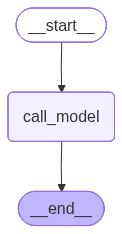

In [16]:

graph

In [17]:
config = {"configurable": {"thread_id": "chat-1"}}

result = graph.invoke(
    {"messages": [{"role": "user", "content": "Hi, my name is ABhinav."}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 10
Hi, my name is ABhinav.


"Hi Abhinav! It's nice to meet you.\n\nHow can I help you today?"

In [18]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "I am learning LangGraph."}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 41
Hi, my name is ABhinav.
Hi Abhinav! It's nice to meet you.

How can I help you today?
I am learning LangGraph.


'That\'s fantastic, Abhinav! LangGraph is a really powerful and interesting framework for building robust, stateful, and agentic LLM applications.\n\nIt\'s a great choice for anything from multi-turn conversations and task-oriented agents to complex data processing pipelines.\n\nHow can I help you on your LangGraph journey today? Are you:\n\n*   **Just starting out** and looking for an overview or "where to begin"?\n*   **Working through specific examples** and have questions about them?\n*   **Trying to implement a particular concept** (like state, nodes, edges, or conditional routing)?\n*   **Debugging some code** you\'ve written?\n*   **Looking for resources** or best practices?\n\nLet me know what\'s on your mind!'

In [19]:

result = graph.invoke(
    {"messages": [{"role": "user", "content": "Can you explain short term memory?"}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 13
Can you explain short term memory?


'Short-term memory (STM) is a temporary storage system that holds a limited amount of information for a brief period, allowing us to actively process and use that information in the moment. It\'s like your brain\'s "mental scratchpad" or "desktop" where you keep things you\'re currently working on.\n\nHere are the key characteristics and aspects of short-term memory:\n\n1.  **Limited Duration:**\n    *   Information in STM is typically held for a very short time, usually around **15 to 30 seconds** without rehearsal.\n    *   If you don\'t actively think about, repeat, or pay attention to the information, it quickly fades or decays.\n\n2.  **Limited Capacity:**\n    *   STM can only hold a small amount of information at any given time.\n    *   The famous "Magic Number 7, Plus or Minus 2" (coined by George A. Miller) suggests that most people can hold about **5 to 9 discrete items or "chunks"** of information in their short-term memory.\n    *   A "chunk" is a meaningful unit of inform

In [20]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "What is my name?"}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 8
What is my name?


"As an AI, I don't know your name. I don't have access to personal information about you unless you choose to tell me."

In [ ]:

for item in graph.get_state({"configurable": {"threa                   d_id": "chat-1"}}).values['messages']:
    print(item.content)
    print('-'*120)

Hi, my name is ABhinav.
------------------------------------------------------------------------------------------------------------------------
Hi Abhinav! It's nice to meet you.

How can I help you today?
------------------------------------------------------------------------------------------------------------------------
I am learning LangGraph.
------------------------------------------------------------------------------------------------------------------------
That's fantastic, Abhinav! LangGraph is a really powerful and interesting framework for building robust, stateful, and agentic LLM applications.

It's a great choice for anything from multi-turn conversations and task-oriented agents to complex data processing pipelines.

How can I help you on your LangGraph journey today? Are you:

*   **Just starting out** and looking for an overview or "where to begin"?
*   **Working through specific examples** and have questions about them?
*   **Trying to implement a particular conc